Tutorial to demonstrate a new interferometer

In [5]:
# pip install gwinc

In [1]:
#!/bin/python
"""
Tutorial to demonstrate a new interferometer

We place a new instrument in Gingin, with an A+ sensitivity in a network of A+
interferometers at Hanford and Livingston
"""
from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt

import bilby

# Set the duration and sampling frequency of the data segment that we're going
# to inject the signal into
duration = 1638400.
sampling_frequency = 2.0e-2

# Specify the output directory and the name of the simulation.
outdir = 'outdir'
label = 'LISA_static'
bilby.core.utils.setup_logger(outdir=outdir, label=label)


10:53 bilby INFO    : Running bilby version: 0.5.3:


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


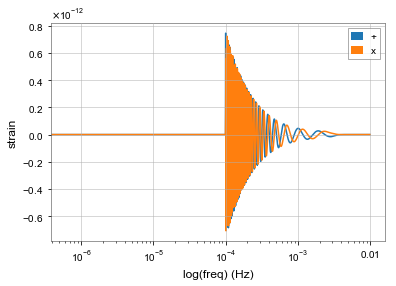

In [2]:
# Set up a random seed for result reproducibility.  This is optional!
np.random.seed(88170232)

injection_parameters = dict(
    mass_1=3.6e6, mass_2=2.9e6, a_1=0.4, a_2=0.3, tilt_1=0.0, tilt_2=0.0,
    phi_12=1.7, phi_jl=0.3, luminosity_distance=1000, theta_jn=0.4, psi=0.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                          reference_frequency=1.0e-4,
                          minimum_frequency=1.0e-4)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    start_time=injection_parameters['geocent_time'] - duration)


freq = waveform_generator.frequency_array
hplus = waveform_generator.frequency_domain_strain(injection_parameters)['plus']
hcross = waveform_generator.frequency_domain_strain(injection_parameters)['cross']
plt.plot(freq, hplus,label='+')
plt.plot(freq, hcross,label='x')
plt.xlabel('log(freq) (Hz)')
plt.ylabel('strain')
plt.legend()
plt.xscale('log')
plt.savefig('LISA_IMRPhenomPv2_waveform.png', dpi=200)

In [3]:
# The location of this new detector is not defined in Bilby, so we need to add it
LISA_static = bilby.gw.detector.Interferometer(
    power_spectral_density=bilby.gw.detector.PowerSpectralDensity(
        psd_file='lisa_psd.txt'),
    name='LISA_static', length=2.5e6,
    minimum_frequency=min(waveform_generator.frequency_array), \
    maximum_frequency=max(waveform_generator.frequency_array),
    latitude=-31.34, longitude=115.91,
    elevation=0., xarm_azimuth=2., yarm_azimuth=125.)

# Set up new detector to InterferomerList
interferometers = bilby.gw.detector.InterferometerList([])

# append the new detector to the list 
interferometer = interferometers.append(LISA_static)


for interferometer in interferometers:
    interferometer.set_strain_data_from_zero_noise(
        sampling_frequency=sampling_frequency, duration=duration,
     start_time=injection_parameters['geocent_time'] - duration)
    interferometer.inject_signal(
        parameters=injection_parameters, waveform_generator=waveform_generator)

#     # plot the data for sanity
#     signal = interferometer.get_detector_response(
#         waveform_generator.frequency_domain_strain(), injection_parameters)
#     interferometer.plot_data(signal=signal, outdir=outdir, label=label)

10:53 bilby INFO    : Injected signal in LISA_static:
10:53 bilby INFO    :   optimal SNR = 39195.52
10:53 bilby INFO    :   matched filter SNR = 39195.52+0.00j
10:53 bilby INFO    :   mass_1 = 3600000.0
10:53 bilby INFO    :   mass_2 = 2900000.0
10:53 bilby INFO    :   a_1 = 0.4
10:53 bilby INFO    :   a_2 = 0.3
10:53 bilby INFO    :   tilt_1 = 0.0
10:53 bilby INFO    :   tilt_2 = 0.0
10:53 bilby INFO    :   phi_12 = 1.7
10:53 bilby INFO    :   phi_jl = 0.3
10:53 bilby INFO    :   luminosity_distance = 1000
10:53 bilby INFO    :   theta_jn = 0.4
10:53 bilby INFO    :   psi = 0.659
10:53 bilby INFO    :   phase = 1.3
10:53 bilby INFO    :   geocent_time = 1126259642.413
10:53 bilby INFO    :   ra = 1.375
10:53 bilby INFO    :   dec = -1.2108


10:53 bilby INFO    : Time jittering requested with non-time-marginalised likelihood, ignoring.
10:53 bilby INFO    : Running for label 'LISA_static', output will be saved to 'outdir'
10:53 bilby INFO    : Search parameters:
10:53 bilby INFO    :   mass_1 = Uniform(minimum=2000000.0, maximum=5000000.0, name='mass_1', latex_label='$m_1$', unit=None, boundary=None)
10:53 bilby INFO    :   mass_2 = Uniform(minimum=2000000.0, maximum=5000000.0, name='mass_2', latex_label='$m_2$', unit=None, boundary=None)
10:53 bilby INFO    :   geocent_time = Uniform(minimum=1126259642.3130002, maximum=1126259642.513, name=None, latex_label='$t_c$', unit='s', boundary=None)
10:53 bilby INFO    :   a_1 = 0.4
10:53 bilby INFO    :   a_2 = 0.3
10:53 bilby INFO    :   tilt_1 = 0.0
10:53 bilby INFO    :   tilt_2 = 0.0
10:53 bilby INFO    :   theta_jn = 0.4
10:53 bilby INFO    :   phase = 1.3
10:53 bilby INFO    :   psi = 0.659
10:53 bilby INFO    :   ra = 1.375
10:53 bilby INFO    :   dec = -1.2108
10:53 bilby

 11451| logz ratio=759.315 +/-  0.124 | dlogz:  0.000 >  0.100


10:53 bilby INFO    : Sampling time: 0:28:32.888483
10:53 bilby INFO    : Summary of results:
nsamples: 12475
log_noise_evidence: -768144258.946
log_evidence: -768143499.631 +/-  0.124
log_bayes_factor: 759.315 +/-  0.124



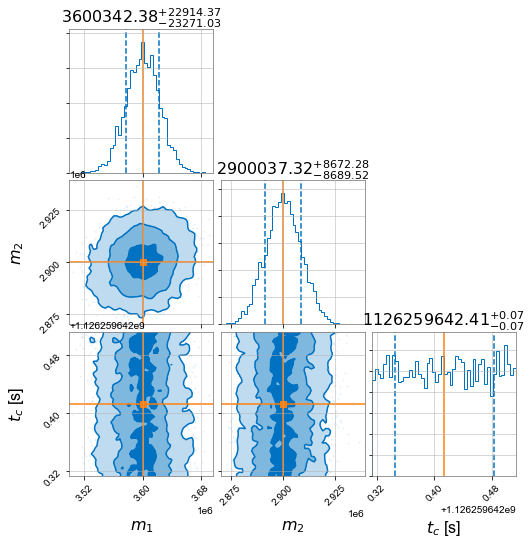

In [4]:
#  create the priors
priors = dict()
for key in ['a_1', 'a_2', 'tilt_1', 'tilt_2', 'theta_jn', 'phase', 'psi', 'ra',
            'dec', 'phi_12', 'phi_jl', 'luminosity_distance']:
    priors[key] = injection_parameters[key]
    
priors['mass_1'] = bilby.core.prior.Uniform(2.0e6, 5.0e6, name='mass_1')
priors['mass_2'] = bilby.core.prior.Uniform(2.0e6, 5.0e6, name='mass_2')
priors['geocent_time'] = bilby.core.prior.Uniform(
    injection_parameters['geocent_time'] - 0.1,
    injection_parameters['geocent_time'] + 0.1, latex_label='$t_c$', unit='s')



# define likelihood
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=interferometers, waveform_generator=waveform_generator)

# launch sampler
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', npoints=1024,
    injection_parameters=injection_parameters, outdir=outdir, label=label)

result.plot_corner()
